# multivariate linear regression

In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from word2number import w2n
import seaborn as sns

In [2]:
#reading the dataset
d=pd.read_csv("C:/Users/somaa/Downloads/hiring (1).csv")
d

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


Data Preprocessing

In [3]:
#filling missing values
d.experience=d.experience.fillna("zero")
d

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [4]:
import math
med=(d["test_score(out of 10)"].median())
med

8.0

In [5]:
#filling missing value in test score column with median
d["test_score(out of 10)"]= d["test_score(out of 10)"].fillna(med)
d

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [6]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   experience                  8 non-null      object 
 1   test_score(out of 10)       8 non-null      float64
 2   interview_score(out of 10)  8 non-null      int64  
 3   salary($)                   8 non-null      int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 384.0+ bytes


In [7]:
d.experience = d.experience.apply(w2n.word_to_num)
d

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


Data Analysis

C:\Users\somaa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'salary')

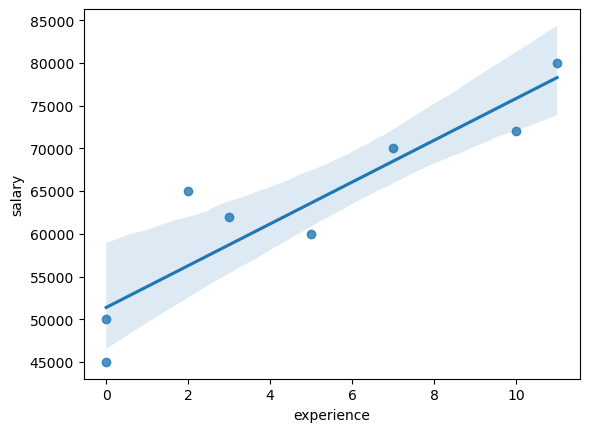

In [9]:
sns.regplot(d["experience"],d["salary($)"])
plt.xlabel("experience")
plt.ylabel("salary")

Text(0, 0.5, 'salary')

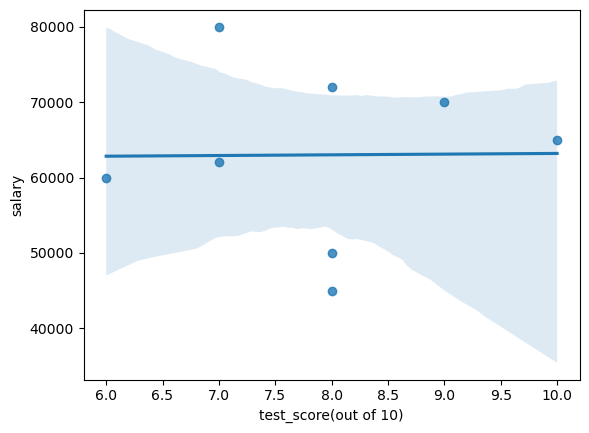

In [10]:
sns.regplot(d["test_score(out of 10)"],d["salary($)"])
plt.xlabel("test_score(out of 10)")
plt.ylabel("salary")

Text(0, 0.5, 'salary')

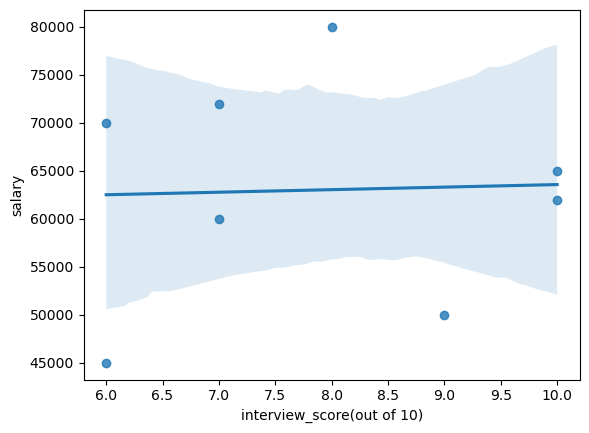

In [11]:
sns.regplot(d["interview_score(out of 10)"],d["salary($)"])
plt.xlabel("interview_score(out of 10)")
plt.ylabel("salary")

In [12]:
#using linear regression model
from sklearn import linear_model 
model= linear_model.LinearRegression()
X=d[["experience","test_score(out of 10)","interview_score(out of 10)"]]
y=d["salary($)"]
model.fit(X,y)

LinearRegression()

In [13]:
#prediction
model.predict([[2,9,6]])

C:\Users\somaa\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53205.96797671])

In [14]:
#checking the score
model.score(X,y)

0.961678000257796